# OR_LAB CODING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import re
import os
from datetime import datetime, timedelta
import pytz
import cv2
import warnings
warnings.filterwarnings("ignore")

# Data Definition

In [2]:
folder_coordinate = '10_50mm'
position_column = 'Position [mm]' # set the this colume become an index
folder_project = 'project'
folder_work = 'OR Lab'
platform_directory = 'C:/Users/azimilga' # folder path, gani fully path were C:\Users\azimilga\project\OR Lab\Cross\10_50mm

# Airflow

In [ ]:
temp_air1 = 21
temp_air2 = 23
folder_name = 'cross'
coordinate_y1 = 10
coordinate_y2 = 50
directory_path = platform_directory + '/' + folder_project + '/' + folder_work + '/'+ folder_name + '/'+ folder_coordinate

reynold_number = 200
vent_type = 'novent'   # this variable need to be rewrite   #'laf'   #'mix'   #'novent'


## Data Import

In [ ]:
csv_file_header11 = str(temp_air1) + '_' + vent_type + '_' + folder_name + '_'+str(coordinate_y1) #define the file names    this for 10 mm xxx_y1 is 10 mm and also for 21
folder_path1 = directory_path  + '/' + vent_type # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(csv_file_header11)] # get list of csv files, function for f in specific directory (folder_path) started with csv_file_header11 and ends with endswith('.csv')
dfs1 = [] # list to store dataframes
#looping
for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',')
    df = df.set_index(position_column)# read csv file into a dataframe, set the specific columms df.set_index(position_column)
    dfs1.append(df) # join them one by one

combined1 = pd.concat(dfs1, axis=1, ignore_index=False) #select values only without an index and colect in the single table
#combined1['ave V (m/s)'] = combined1['Standard deviation of Vx [m/s]']+ 245       - this is if I want add new column with other calculations
combined1['u (m/s)'] = ((combined1['Standard deviation of Vx [m/s]']**2 +    combined1['Standard deviation of Vy [m/s]']**2)*0.5)**0.5
combined1['turbint (%)'] = 100*combined1['u (m/s)']/combined1['Avg V [m/s]']
combined1['temperature'] = temp_air1
combined1['Re_Numb'] =reynold_number

In [ ]:
csv_file_header12 = str(temp_air1) + '_' + vent_type + '_' + folder_name + '_'+str(coordinate_y2)  #define the file names    this for 50 mm xxx_y2 is 50 mm and also for 21
folder_path1 = directory_path + '/' + vent_type # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(csv_file_header12)] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',')
    df = df.set_index(position_column)# read csv file into a dataframe
    dfs1.append(df)

combined2 = pd.concat(dfs1, axis=1, ignore_index=False)
combined2['u (m/s)'] = ((combined2['Standard deviation of Vx [m/s]']**2 +    combined2['Standard deviation of Vy [m/s]']**2)*0.5)**0.5
combined2['turbint (%)'] = 100*combined2['u (m/s)']/combined2['Avg V [m/s]']
combined2['Re_Numb'] =reynold_number
combined2['temperature'] = temp_air1

In [ ]:
combined2.head(5)

In [ ]:
csv_file_header21 = str(temp_air2) + '_' + vent_type + '_' + folder_name + '_'+str(coordinate_y1)   #define the file names    this for 10 mm xxx_y1 is 10 mm and also for 23 C
folder_path1 = directory_path + '/' + vent_type # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(csv_file_header21)] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',')
    df = df.set_index(position_column)# read csv file into a dataframe
    dfs1.append(df)

combined3 = pd.concat(dfs1, axis=1, ignore_index=False)
combined3['u (m/s)'] = ((combined3['Standard deviation of Vx [m/s]']**2 +    combined3['Standard deviation of Vy [m/s]']**2)*0.5)**0.5
combined3['turbint (%)'] = 100*combined3['u (m/s)']/combined3['Avg V [m/s]']
combined3['temperature'] = temp_air2
combined3['Re_Numb'] =reynold_number

In [ ]:
combined3.head(5)

In [ ]:
csv_file_header22 = str(temp_air2) + '_' + vent_type + '_' + folder_name + '_'+str(coordinate_y2)  #define the file names    this for 50 mm xxx_y2 is 50 mm and also for 23 C
folder_path1 = directory_path + '/' + vent_type # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(csv_file_header22)] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',')
    df = df.set_index(position_column)# read csv file into a dataframe
    dfs1.append(df)

combined4 = pd.concat(dfs1, axis=1, ignore_index=False)
combined4['u (m/s)'] = ((combined4['Standard deviation of Vx [m/s]']**2 +    combined4['Standard deviation of Vy [m/s]']**2)*0.5)**0.5
combined4['turbint (%)'] = 100*combined4['u (m/s)']/combined4['Avg V [m/s]']
combined4['temperature'] = temp_air2
combined4['Re_Numb'] =reynold_number

In [ ]:
combined4.head(5)

In [ ]:
with pd.ExcelWriter(directory_path + '/'+ folder_coordinate + '_' + str(temp_air1) + '_' + str(temp_air2) +'_' + vent_type + '.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    combined1.to_excel(writer, sheet_name = csv_file_header11, index=True) # this 10 mm 21
    combined2.to_excel(writer, sheet_name = csv_file_header12, index=True) # this 50 mm 21
    combined3.to_excel(writer, sheet_name = csv_file_header21, index=True) # this 10 mm 23
    combined4.to_excel(writer, sheet_name = csv_file_header22, index=True) # this 10 mm 23

## Data Combination

In [ ]:
# Folder containing Excel files
folder_path = directory_path + '/' 
csv_file_header_in = folder_coordinate 
# List to store dataframes
dfs = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx') and file_name.startswith(csv_file_header_in):
        # Read all sheets from the Excel file into a dictionary of dataframes
        file_path = os.path.join(folder_path, file_name)
        sheets = pd.read_excel(file_path, sheet_name=None)
        
        # Concatenate all dataframes from the sheets into a single dataframe
        df = pd.concat(sheets.values(), ignore_index=True)
        
        # Append the concatenated dataframe to the list
        dfs.append(df)

# Concatenate all dataframes in the list vertically
combined_ML = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_ML.describe()

In [ ]:
combined_ML.columns #info()#['Re_Numb'].nunique

# ML Process

In [ ]:
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
def features_plotter_reg (df):
    df.drop('LinearReg', axis=1).set_index('features').plot(kind='barh', stacked=True)
    # Customize labels and title
    plt.ylabel('measured IAQ parameters')
    plt.xlabel('(Cummulative) feature of importances')
    plt.title('ML Result : importances of features')

## Data Import

In [ ]:
variable_scale = MinMaxScaler()  #StandardScaler()
train_percent = 80         #how many percent is the training dataset you wish from big dataset you've uploaded?
target_col    = ['Standard deviation of V [m/s]']  #what is your output/target?

In [ ]:
data_come = combined_ML[['Position [mm]',
                        #  'Avg Vx [m/s]',
                        #  'Avg Vy [m/s]',
                         'Avg V [m/s]',
                        #  'Average kinetic energy [(m/s)^2]',
                        #  'Standard deviation of Vx [m/s]',
                        #  'Standard deviation of Vy [m/s]',
                         'Standard deviation of V [m/s]',
                        #  'Turbulent kinetic energy [(m/s)^2]',
                        #  'Reynolds stress XY [(m/s)^2]',
                        #  'Reynolds stress XX [(m/s)^2]',
                        #  'Reynolds stress YY [(m/s)^2]',
                        #  'TSS max 2D [(m/s)^2]',
                        #  'u (m/s)',
                         'turbint (%)',
                         'temperature'
                        #  ,'Re_Numb'
                         ]].dropna(how='any',axis=0).copy()

xb = data_come.drop(target_col, axis=1)
x= variable_scale.fit_transform(xb)
y = data_come.loc[:, target_col]

In [ ]:
xb.describe()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = (train_percent/100), shuffle = True)
xb.columns #showing what kind of inputs you have

## A. Linear Regression Model

In [ ]:
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

In [ ]:
y_train_pred_LinReg = LinReg.predict(x_train)
y_test_pred_LinReg = LinReg.predict(x_test)
print(LinReg.intercept_)
print(LinReg.coef_)
print(LinReg.score(x_test, y_test))

In [ ]:
r2_LinReg = r2_score(y_test,y_test_pred_LinReg).round(3)
mse_LinReg=mean_squared_error(y_test,y_test_pred_LinReg).round(3)
mae_LinReg=mean_absolute_error(y_test,y_test_pred_LinReg).round(3)
rmse_LinReg=np.sqrt(mean_squared_error(y_test,y_test_pred_LinReg)).round(3)
CV_value_LinReg= explained_variance_score(y_test,y_test_pred_LinReg).round(3)
print('Linear Regression Performance')
print('R2 : ', r2_LinReg)
print('MSE : ', mse_LinReg)
print('MAE : ', mae_LinReg)
print('RMSE : ', rmse_LinReg)
print('CV : ', CV_value_LinReg)

## B. Extra Trees Regression

In [ ]:
model = ExtraTreesRegressor()
param_grid = {
    'criterion'    : ['squared_error', 'friedman_mse', 'absolute_error', 'poission'],
    'max_depth'    : [1,2,3,5,8,13,21,34,55,89,144,200,500],
    'n_estimators' : [5,10,20,50,100,200,500],
    'max_features' : ['sqrt', 'log2'],
    'random_state' : [1,2,5,10,50,100]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
grid_search.fit(x_train, y_train )

model_ETR = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
y_train_pred_ETR = model_ETR.predict(x_train)
y_test_pred_ETR = model_ETR.predict(x_test)

print("Accuracy score (training): {:.3f}".format(model_ETR.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(model_ETR.score(x_test, y_test)))

In [ ]:
f_importance_ETR = pd.DataFrame({'features':xb.columns,
                                'feature_importances ETR':model_ETR.feature_importances_}).sort_values(by = 'feature_importances ETR',ascending = False)

In [ ]:
r2_ETR = r2_score(y_test,y_test_pred_ETR).round(3)
mse_ETR = mean_squared_error(y_test,y_test_pred_ETR).round(3)
mae_ETR = mean_absolute_error(y_test,y_test_pred_ETR).round(3)
rmse_ETR = np.sqrt(mean_squared_error(y_test,y_test_pred_ETR)).round(3)
CV_value_ETR = explained_variance_score(y_test,y_test_pred_ETR).round(3)
print('Extra Tree Performance')
print('R2 : ', r2_ETR)
print('MSE : ', mse_ETR)
print('MAE : ', mae_ETR)
print('RMSE : ', rmse_ETR)
print('CV : ', CV_value_ETR)

In [ ]:
plt.figure(figsize=(25, 12))
plot_tree(model_ETR)
plt.show()

## C. SVM Regressor

In [ ]:
model =SVR(   )
param_grid = {
    'C'        : [1,1.1,1.25,1.5],
    'kernel'   : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree'   : [ 1,2,3,4,5,6,7,8,9,10],
    'gamma'    :  ['scale','auto']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train )

model_SVR = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_.round(3))

y_train_pred_SVR = model_SVR.predict(x_train)
y_test_pred_SVR = model_SVR.predict(x_test)

print("Accuracy score (training): {:.3f}".format(model_SVR.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(model_SVR.score(x_test, y_test)))

In [ ]:
r2_SVR = r2_score(y_test,y_test_pred_SVR).round(3)
mse_SVR=mean_squared_error(y_test,y_test_pred_SVR).round(3)
mae_SVR=mean_absolute_error(y_test,y_test_pred_SVR).round(3)
rmse_SVR=np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3)
CV_value_SVR= explained_variance_score(y_test,y_test_pred_SVR).round(3)
print('Support Vector Performance')
print('R2 : ', r2_SVR)
print('MSE : ', mse_SVR)
print('MAE : ', mae_SVR)
print('RMSE : ', rmse_SVR)
print('CV : ', CV_value_SVR)

## D. Decision Tree Regression

In [ ]:
model =DecisionTreeRegressor()
param_grid = {
    'criterion'    : ['squared_error', 'friedman_mse', 'absolute_error', 'poission'],
    'splitter'     : ['best','random'],
    'max_depth'    : [1,2,3,5,8,13,21,34,55,89,144,200,500],
    'max_features' : ['sqrt', 'log2'],
    'random_state' : [1,2,5,10,50,100]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
grid_search.fit(x_train, y_train )

model_DTR = grid_search.best_estimator_
y_test_pred_DTR = model_DTR.predict(x_test)
y_train_pred_DTR = model_DTR.predict(x_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
y_train_pred_DTR = model_DTR.predict(x_train)
y_test_pred_DTR = model_DTR.predict(x_test)

print("Accuracy score (training): {:.3f}".format(model_DTR.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(model_DTR.score(x_test, y_test)))

In [ ]:
f_importance_DTR = pd.DataFrame({'features':xb.columns,
                                'feature_importances DTR':model_DTR.feature_importances_}).sort_values(by = 'feature_importances DTR',ascending = False)
f_importance_DTR

In [ ]:
r2_DTR = r2_score(y_test,y_test_pred_DTR).round(3)
mse_DTR=mean_squared_error(y_test,y_test_pred_DTR).round(3)
mae_DTR=mean_absolute_error(y_test,y_test_pred_DTR).round(3)
rmse_DTR=np.sqrt(mean_squared_error(y_test,y_test_pred_DTR)).round(3)
CV_value_DTR= explained_variance_score(y_test,y_test_pred_DTR).round(3)
print('Decision Tree Performance')
print('R2 : ', r2_DTR)
print('MSE : ', mse_DTR)
print('MAE : ', mae_DTR)
print('RMSE : ', rmse_DTR)
print('CV : ', CV_value_DTR)

In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(DT_Reg)
#plt.show()

## E. Random Forest Regression Model

In [ ]:
model =RandomForestRegressor()
param_grid = {
    'criterion'    : ['squared_error', 'friedman_mse', 'absolute_error', 'poission'],
    'max_depth': [1,2,3,5,8,13,21,34,55],
    'n_estimators' : [5,10,20,50,100,200,500],
    'max_features' : ['sqrt', 'log2'],
    'random_state': [1,2,10,50,100,200]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
grid_search.fit(x_train, y_train )

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

model_RFR = grid_search.best_estimator_

y_train_pred_RFR = model_RFR.predict(x_train)
y_test_pred_RFR = (model_RFR.predict(x_test)).reshape(-1,1)

print(DT_Reg.score(x_test, y_test))
print("Accuracy score (training): {:.3f}".format(model_RFR.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(model_RFR.score(x_test, y_test)))

In [ ]:
f_importance_RFR = pd.DataFrame({'features':xb.columns,
                                'feature_importances':model_RFR.feature_importances_}).sort_values(by = 'feature_importances',ascending = False)
f_importance_RFR

In [ ]:
r2_RFR = r2_score(y_test,y_test_pred_RFR).round(3)
mse_RFR = mean_squared_error(y_test,y_test_pred_RFR).round(3)
mae_RFR = mean_absolute_error(y_test,y_test_pred_RFR).round(3)
rmse_RFR = np.sqrt(mean_squared_error(y_test,y_test_pred_RFR)).round(3)
CV_value_RFR = explained_variance_score(y_test,y_test_pred_RFR).round(3)
print('Random Forest Regression Performance')
print('R2 : ', r2_RFR)
print('MSE : ', mse_RFR)
print('MAE : ', mae_RFR)
print('RMSE : ', rmse_RFR)
print('CV : ', CV_value_RFR)

In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(model_RFR)
#plt.show()

## GradientBoost Regression

## Results & Comparison : Regression Model

In [ ]:
import joblib
#saving the model for the app
joblib.dump(LinReg,  platform_directory +'/' +   target_col + '_LinReg.joblib')
joblib.dump(model_ETR,  platform_directory +'/' +   target_col + '_ETR.joblib')
joblib.dump(model_SVR,  platform_directory +'/' +   target_col + '_SVR.joblib')
joblib.dump(model_DTR,  platform_directory +'/' +   target_col + '_DTR.joblib')
joblib.dump(model_RFR,  platform_directory +'/' +   target_col + '_RFR.joblib')


In [ ]:
#see result of prediction result
# plt.figure(figsize=(22,6))
# plt.plot(pd.DataFrame(y_test_pred_ETR), label = 'Prediction : ET Reg' , linewidth= 0.9 )
# plt.plot(pd.DataFrame(y_test_pred_RFR), label = 'Prediction : Ranfor Reg' , linewidth= 0.9 )
# plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real' , linewidth= 0.7 )
# plt.legend()
# plt.title('Real vs. Prediction')
# plt.ylabel('value')
# plt.show(  )
#plt.savefig("predict test.jpg")

#see result of prediction result
plt.figure(figsize=(22,6))
plt.plot(pd.DataFrame(y_test_pred_LinReg), label = 'Prediction : LinReg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_DTR), label = 'Prediction : DT Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real' , linewidth= 0.7 )
plt.legend()
plt.title('Real vs. Prediction')
plt.ylabel('value')
plt.show(  )
#plt.savefig("predict test.jpg")

In [ ]:
plt.scatter(y_test,y_test_pred_LinReg)

In [ ]:
data_result_reg = np.array([['Algorithm', 'R2', 'MSE', 'MAE', 'RMSE', 'CV Value'],
                ['Linear Regression', r2_LinReg, mse_LinReg, mae_LinReg, rmse_LinReg, CV_value_LinReg],
                ['Support Vector Regression', r2_SVR, mse_SVR, mae_SVR, rmse_SVR, CV_value_SVR],
                ['Extra Trees Regression', r2_ETR, mse_ETR, mae_ETR, rmse_ETR, CV_value_ETR],
                ['Decision Tree Regression', r2_DTR, mse_DTR, mae_DTR, rmse_DTR, CV_value_DTR],
                ['Random Forest Regression', r2_RFR, mse_RFR, mae_RFR, rmse_RFR, CV_value_RFR]
                 ])

In [ ]:
table_regression = pd.DataFrame(data=data_result_reg[1:, 1:],
                     index = data_result_reg[1:,0],
                     columns=(data_result_reg[0,1:])).sort_values('RMSE', ascending = True)
table_regression

In [ ]:
coef_Lin_reg = LinReg.coef_.flatten()
#coef_SVR = (model_SVR.coef_).flatten()

data_importanceR = pd.DataFrame({"features" : xb.columns,
                                "Extr.Trees.Reg" : model_ETR.feature_importances_,
                                "Dec.Tree.Reg" : model_DTR.feature_importances_,
                                "RandForest.Reg": model_RFR.feature_importances_,
                                #"SV.Reg":coef_SVR,
                                "LinearReg": coef_Lin_reg
                                }).sort_values('Extr.Trees.Reg', ascending = False)
data_importanceR

In [ ]:
features_plotter_reg (data_importanceR)

# Velocity

In [ ]:
folder_work = 'OR Lab'
folder_name = 'values'
directory_path = platform_directory + '/' + folder_project + '/' + folder_work + '/' + folder_name + '/'


In [ ]:
# Number of columns
num_columns = 12

# Generate column names
column_Vx = [f'vx_{i}' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_Vy = [f'vy_{i}' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_V = [f'V_{i}' for i in range(1, num_columns + 1)]  #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_u = [f'u{i}_(m/s)' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_turb_int = [f'Ti_{i}_(%)' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)

In [ ]:
print(column_Vx)

In [ ]:
specific_letter1 = 'Velocity'
data_vx = pd.read_csv(directory_path+'Velocity Vx.csv', delimiter=',').set_index('Position [mm]').filter(regex=f'^{specific_letter1}', axis=1) # import the csv files, set Position [mm] as index, and select specific columns by the names 'specific_letter1
data_vx.columns = column_Vx   #rename the columns
data_vy = pd.read_csv(directory_path+'Velocity Vy.csv', delimiter=',').set_index('Position [mm]').filter(regex=f'^{specific_letter1}', axis=1) # import the csv files, set Position [mm] as index, and select specific columns by the names 'specific_letter1
data_vy.columns = column_Vy   #rename the columns

specific_letter2= 'Position'
data_V = pd.read_csv(directory_path+'Velocity V.csv', delimiter=',').set_index('Position [mm]') # import the csv files, set Position [mm] as index
data_V = data_V.drop(columns=data_V.filter(regex=f'^{specific_letter2}', axis=1).columns, axis=1) #drop specific column that contain a letter as mentioned in specific_letter2
data_V.columns = column_V    #rename the columns


In [ ]:
dev_vx = data_vx.sub(data_vx.mean(axis=1), axis=0)**2      #operation for calculating Vx
dev_vx.columns = [f'dev_{column}' for column in dev_vx.columns]   #rename the columns

dev_vy = data_vy.sub(data_vy.mean(axis=1), axis=0)**2     #operation for calculating Vy
dev_vy.columns = [f'dev_{column}' for column in dev_vy.columns]  #rename the columns

data_vx['vx_mean'] = data_vx.mean(axis=1)     #operation to generate average value, and show it
velocity_vx = data_vx.join(dev_vx, how='outer')     #operation to join 2 tables as together, between data_vx and dev_vx
data_vy['vy_mean'] = data_vy.mean(axis=1)     #operation to generate average value, and show it
velocity_vy = data_vy.join(dev_vy, how='outer')    #operation to join 2 tables as together, between data_vy and dev_vy


In [ ]:
data_vx.head(5)

In [ ]:
data_vy.head(5)

In [ ]:
data_V.head(5)

In [ ]:
dev_vx.head(5)

In [ ]:
dev_vy.head(5)

In [ ]:
data_u = (dev_vx.add(dev_vy.values)/2).applymap(lambda x: x**0.5)   #operation for calculating u'
data_u.columns = column_u  #renaming the columns
data_u.head(5)

In [ ]:
turb_int = data_u.div(data_V.values)*100      #operation to calculate tubulent intensity : u' / V  and multiply with 100
turb_int.columns = column_turb_int     #renaming the columns
turb_int.head(5)#.describe()

In [ ]:
turb_int.T.iloc[:10,3:6]

In [ ]:
turb_int.T.iloc[:10,3:9].plot()

In [ ]:
with pd.ExcelWriter(directory_path + '/'+ 'result_velocity calculation.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    velocity_vx.to_excel(writer, sheet_name = 'vel_Vx', index=True) 
    velocity_vy.to_excel(writer, sheet_name = 'vel_Vy', index=True)
    data_V.to_excel(writer, sheet_name = 'vel_V', index=True)
    data_u.to_excel(writer, sheet_name = 'vel_u', index=True) 
    turb_int.to_excel(writer, sheet_name = 'turb_int', index=True) 

# Velocity v02

In [ ]:
folder_work = 'OR Lab'
folder_name = 'values'
directory_path = platform_directory + '/' + folder_project + '/' + folder_work + '/' + folder_name + '/'


In [ ]:
# Number of columns
num_columns = 

# Generate column names
column_Vx = [f'vx_{i}' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_Vy = [f'vy_{i}' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_V = [f'V_{i}' for i in range(1, num_columns + 1)]  #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_u = [f'u{i}_(m/s)' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)
column_turb_int = [f'Ti_{i}_(%)' for i in range(1, num_columns + 1)] #generate columns' names , start from 1, generate a columns until "num_columns", from 0 colums  (0, num_columns + 1)

In [ ]:
print(column_Vx)

In [ ]:
specific_letter1 = 'Velocity'
data_vx = pd.read_csv(directory_path+'Velocity Vx.csv', delimiter=',').set_index('Position [mm]').filter(regex=f'^{specific_letter1}', axis=1) # import the csv files, set Position [mm] as index, and select specific columns by the names 'specific_letter1
data_vx.columns = column_Vx   #rename the columns
data_vy = pd.read_csv(directory_path+'Velocity Vy.csv', delimiter=',').set_index('Position [mm]').filter(regex=f'^{specific_letter1}', axis=1) # import the csv files, set Position [mm] as index, and select specific columns by the names 'specific_letter1
data_vy.columns = column_Vy   #rename the columns

specific_letter2= 'Position'
data_V = pd.read_csv(directory_path+'Velocity V.csv', delimiter=',').set_index('Position [mm]') # import the csv files, set Position [mm] as index
data_V = data_V.drop(columns=data_V.filter(regex=f'^{specific_letter2}', axis=1).columns, axis=1) #drop specific column that contain a letter as mentioned in specific_letter2
data_V.columns = column_V    #rename the columns


In [ ]:
stdev_vx = data_vx.sub(data_vx.mean(axis=1), axis=0)**2      #operation for calculating Vx
stdev_vx.columns = [f'dev_{column}' for column in stdev_vx.columns]   #rename the columns

stdev_vy = data_vy.sub(data_vy.mean(axis=1), axis=0)**2     #operation for calculating Vy
stdev_vy.columns = [f'dev_{column}' for column in stdev_vy.columns]  #rename the columns

data_vx['vx_mean'] = data_vx.mean(axis=1)     #operation to generate average value, and show it
velocity_vx = data_vx.join(stdev_vx, how='outer')     #operation to join 2 tables as together, between data_vx and stdev_vx
data_vy['vy_mean'] = data_vy.mean(axis=1)     #operation to generate average value, and show it
velocity_vy = data_vy.join(stdev_vy, how='outer')    #operation to join 2 tables as together, between data_vy and stdev_vy


In [ ]:
data_vx.head(5)

In [ ]:
data_vy.head(5)

In [ ]:
data_V.head(5)

In [ ]:
dev_vx.head(5)

In [ ]:
dev_vy.head(5)

In [ ]:
data_u = (dev_vx.add(dev_vy.values)/2).applymap(lambda x: x**0.5)   #operation for calculating u'
data_u.columns = column_u  #renaming the columns
data_u.head(5)

In [ ]:
turb_int = data_u.div(data_V.values)*100      #operation to calculate tubulent intensity : u' / V  and multiply with 100
turb_int.columns = column_turb_int     #renaming the columns
turb_int.head(5)#.describe()

In [ ]:
turb_int.T.iloc[:10,3:6]

In [ ]:
turb_int.T.iloc[:10,3:9].plot()

In [ ]:
with pd.ExcelWriter(directory_path + '/'+ 'result_velocity calculation.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    velocity_vx.to_excel(writer, sheet_name = 'vel_Vx', index=True) 
    velocity_vy.to_excel(writer, sheet_name = 'vel_Vy', index=True)
    data_V.to_excel(writer, sheet_name = 'vel_V', index=True)
    data_u.to_excel(writer, sheet_name = 'vel_u', index=True) 
    turb_int.to_excel(writer, sheet_name = 'turb_int', index=True) 

# Project Field

In [4]:
file_amounts = 12     #How many files you want to process within the same folder.

folder_work = 'OR Lab'
folder_name = 'project_field'
folder_variable =  'example1' #'data1'   #'velocity'   #'example1'
directory_path = platform_directory + '/' + folder_project + '/' + folder_work + '/' + folder_name + '/' 
folder_path1 = directory_path +  folder_variable
start_file_name = 'B'
column_list = ['x','y','V']
# column_list = ['x','y','V','du/dx','du/dy','dv/dx','dv/dy','vort_z','vort_ab','diver_2d','sw_str_2d','cv','part_size','peak_ratio','unc_V','unc_x','unc_y','vect_ch']

def rename_columns(df,column_list):    #function for  simplifying column's names, and add number 1,2,3, etc
    new_columns = []        #Create a list of new column names
    letters = column_list
    for i in range(1, file_amounts+1):
        for letter in letters:
            new_columns.append(f'{letter}{i}')
    # Rename the columns of the DataFrame
    df.columns = new_columns
    
def filter_columns_head(df, name_start):   #call specific columns with a name beginning with 'what'
    # Filter columns that start with 'u'
    new_df = df[[col for col in df.columns if col.startswith(name_start)]]
    return new_df

def filter_columns_tail(df, name_end):    #call specific columns with a name ended with 'what'
    # Filter columns that start with 'u'
    new_df = df[[col for col in df.columns if col.endswith(name_end)]]
    return new_df

def filter_double_index(df, min_x, max_x, min_y, max_y):
    idx_level_1 = df.index.get_level_values(0)
    idx_level_2 = df.index.get_level_values(1)
    mask = (idx_level_1 >= min_x) & (idx_level_1 <= max_x) & (idx_level_2 >= min_y) & (idx_level_2 <= max_y)
    return df[mask]

def filter_adjust_double_index(df, min_x, max_x, min_y, max_y):
    # Filter the dataframe based on the index ranges
    filtered_df = df.loc[(df.index.get_level_values(0) >= min_x) & (df.index.get_level_values(0) <= max_x) &
                         (df.index.get_level_values(1) >= min_y) & (df.index.get_level_values(1) <= max_y)]
    
    # Determine the minimum values for both index levels
    min_index1 = filtered_df.index.get_level_values(0).min()
    min_index2 = filtered_df.index.get_level_values(1).min()
    
    # Subtract the minimum values to adjust the indices
    adjusted_index = pd.MultiIndex.from_arrays(
        [filtered_df.index.get_level_values(0) - min_index1,
         filtered_df.index.get_level_values(1) - min_index2],
        names=filtered_df.index.names
    )
    
    # Set the adjusted index back to the dataframe
    filtered_df.index = adjusted_index
    
    return filtered_df

## Operation 1

In [ ]:
folder_path1

In [ ]:
 # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(start_file_name)] # get list of csv files, function for f in specific directory (folder_path) started with csv_file_header11 and ends with endswith('.csv')
dfs1 = [] # list to store dataframes
#looping
for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',').set_index(['x [mm]', 'y [mm]'])   # read csv file into a dataframe, set the specific columms df.set_index(position_column)
    dfs1.append(df) # join them one by one

data_value = pd.concat(dfs1, axis=1, ignore_index=False).rename_axis(['x', 'y']) #select values only without an index and colect in the single table
rename_columns(data_value)


In [ ]:
data_value.columns

In [ ]:
data_u = filter_columns_head(data_value,'u')         #call specific columns with a name beginning with 'u'  : u1, u2, u3, u4 .... u12
data_v = filter_columns_head(data_value,'v')        #call specific columns with a name beginning with 'u'  : v1, v2, v3, v4 .... v12
data_V = filter_columns_head(data_value,'V')
data_u.head(5)


In [ ]:
data_ave_u = pd.DataFrame((np.array(data_u)**2  + np.array(data_v)**2), columns= [[f'dev_u{i}' for i in range(1, file_amounts + 1)]], index = data_u.index)   #(create new dataFrame) mathematic operation from 2 dataframes . detach the dataframe become numpy array, do the mathematic operation, and then set back the columns names with same index with 'data_u' dataframe
data_u_accent = pd.DataFrame((((np.array(data_u)**2 + np.array(data_v)**2)/2)**0.5), columns= [[f'u{i}_accent' for i in range(1, file_amounts + 1)]], index = data_u.index)

In [ ]:
data_V.iloc[15000:15010]

In [ ]:
data_u_accent.iloc[15000:15010]

In [ ]:
turb_int.iloc[15000:15010]

In [ ]:
turb_int = pd.DataFrame((100*np.array(data_u_accent)/ np.array(data_V)), index=data_u_accent.index, columns =  [f'TI_{i}' for i in range(1, file_amounts + 1)] ).fillna(0)
turb_int['TI_ave'] = turb_int.mean(axis=1)    #new columns as what name  you wish, do operation of mean value : #axis=1 means operation between columns,,, axis=0 means operation between rows

In [ ]:
data_V.columns

In [ ]:
with pd.ExcelWriter(folder_path1 + 'operation1'+ '.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    data_u.to_excel(writer, sheet_name = 'u', index=True)      #dont forget the index , becaus coordinate -x and -y are the index of the table
    data_v.to_excel(writer, sheet_name = 'v', index=True) 
    data_V.to_excel(writer, sheet_name = 'V', index=True) 
    data_ave_u.to_excel(writer, sheet_name = 'u_ave', index=True)
    data_u_accent.to_excel(writer, sheet_name = 'u_accent', index=True)
    turb_int.to_excel(writer, sheet_name = 'turb_int', index=True) 

## Operation 2

In [ ]:
 # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(start_file_name)] # get list of csv files, function for f in specific directory (folder_path) started with 'start_file_name' and ends with endswith('.csv')
dfs1 = [] # list to store dataframes
#looping
for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',').set_index(['x [mm]', 'y [mm]'])   # read csv file into a dataframe, set the specific columms x and y become index
    dfs1.append(df) # join them one by one

data_value = pd.concat(dfs1, axis=1, ignore_index=False).rename_axis(['x', 'y']) #join all sheets regarding the index
rename_columns(data_value, column_list=)  #simplify the columns name


In [ ]:
data_u = filter_columns_head(data_value,'u')                        #take only 'u' value from all columns
data_v = filter_columns_head(data_value,'v')

In [ ]:
data_dev_u = data_u.sub(data_u.mean(axis=1), axis = 0)              #make another table, with mathematic operation of its substraction with its mean value
data_dev_u = data_dev_u.add_prefix('dev_').applymap(lambda x : (x** 2))   #change the columns name : from 'u1' become 'dev_u1', and square the values   #Please check again here
data_dev_u['u_sum'] = data_dev_u.sum(axis=1)                #make new columns, with math operation 'sum'
data_dev_u['u_mean'] = data_dev_u.mean(axis=1)              #make new columns, with math operation 'mean'

data_dev_v = data_v.sub(data_v.mean(axis=1), axis = 0)
data_dev_v = data_dev_v.add_prefix('dev_').applymap(lambda x : (x** 2))
data_dev_v['v_sum']  = data_dev_v.sum(axis=1)
data_dev_v['v_mean'] = data_dev_v.mean(axis=1)

In [ ]:
data_U_ave    = pd.DataFrame(((data_dev_u['u_sum'] **2 + data_dev_v['v_sum'] **2)**0.5)/file_amounts, columns=['velocity']  , index = data_dev_u.index).round(8)  #Please check again here   #
data_u_accent = pd.DataFrame((((data_dev_u['u_mean']**2 + data_dev_v['v_mean']**2)/2)**0.5), columns= ['u_accent'], index= data_dev_u.index )   .round(8)   #Please check again here   #


In [ ]:
data_U_ave.iloc[15000:15010]

In [ ]:
data_u_accent.iloc[15000:15010]

In [ ]:
turb_int2 = pd.DataFrame((100*(data_u_accent['u_accent'])/ (data_U_ave['velocity'])), index = data_u_accent.index, columns= ['TI (%)']).fillna(0) 
#turb_int = pd.DataFrame((100*np.array(data_u_accent)/ np.array(data_V)), index=data_u_accent.index, columns =  [f'TI_{i}' for i in range(1, file_amounts + 1)] ).fillna(0)
turb_int2


In [ ]:
data_U_ave.describe()

In [ ]:
data_u_accent.describe().join()

In [ ]:
turb_int.describe()

In [ ]:
turb_int.iloc[15000:15010]     #just to see the first 5 rows data in dataFrame

In [ ]:
joined_sheet = data_U_ave.join(data_u_accent, how = 'outer').join(turb_int, how='outer')
joined_sheet.iloc[15000:15010]

In [ ]:
joined_sheet.describe()

In [ ]:
with pd.ExcelWriter(folder_path1 + 'operation2'+ '.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    data_u.to_excel(writer, sheet_name = 'u', index=True) 
    data_v.to_excel(writer, sheet_name = 'v', index=True) 
    data_dev_u.to_excel(writer, sheet_name = 'u_dev', index=True)
    data_dev_v.to_excel(writer, sheet_name = 'v_dev', index=True) 
    data_U_ave.to_excel(writer, sheet_name = 'V_ave', index=True) 
    data_u_accent.to_excel(writer, sheet_name = 'u_accent', index=True)
    turb_int2.to_excel(writer, sheet_name = 'turb_int', index=True) 
    joined_sheet.to_excel(writer, sheet_name = 'joined', index=True) 
    joined_sheet.describe().to_excel(writer, sheet_name = 'desc_stat', index=True) 

## Operation 3

In [5]:
 # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith(start_file_name)] # get list of csv files, function for f in specific directory (folder_path) started with csv_file_header11 and ends with endswith('.csv')
dfs1 = [] # list to store dataframes
#looping
for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',').set_index(['x [mm]', 'y [mm]'])   # read csv file into a dataframe, set the specific columms df.set_index(position_column)
    dfs1.append(df) # join them one by one

data_value = pd.concat(dfs1, axis=1, ignore_index=False).rename_axis(['x', 'y']) #select values only without an index and colect in the single table

In [ ]:
data_value

In [6]:
rename_columns(data_value, column_list)
data_x = filter_columns_head(data_value,'x')         #call specific columns with a name beginning with 'u'  : u1, u2, u3, u4 .... u4000
data_y = filter_columns_head(data_value,'y')        #call specific columns with a name beginning with 'u'  : v1, v2, v3, v4 .... v4000
data_V = filter_columns_head(data_value,'V')
# data_dudx = filter_columns_head(data_value,'du/dx')
# data_dudy = filter_columns_head(data_value,'du/dy')
# data_vort_z = filter_columns_head(data_value,'vort_z')
# data_vort_ab = filter_columns_head(data_value,'vort_ab')
# data_sw_str_2d = filter_columns_head(data_value,'sw_str_2d')
# data_cv = filter_columns_head(data_value,'cv')


In [ ]:
data_value.head(5)

In [ ]:
data_vort_z  #.head(5)

In [ ]:
data_vort_z.mean(axis=1)

In [ ]:
data_vort_z.mean(axis=0)

In [ ]:
data_x

In [ ]:
data_proc['mean_x']

In [ ]:
data_x.subtract(data_proc['mean_x'], axis=0)**2

In [ ]:
stdv_x

In [7]:
data_proc = pd.DataFrame({'V': ((data_x.sum(axis=1)**2 + data_y.sum(axis=1) **2)**0.5)/file_amounts,
                       'sum_x' : data_x.sum(axis=1),
                       'sum_y' : data_y.sum(axis=1),
                       'mean_x' : data_x.mean(axis=1),
                       'mean_y' : data_y.mean(axis=1),
                       }, index = data_x.index)#.round(8)  #Please check again here   #

stdv_x = data_x.subtract(data_proc['mean_x'], axis=0)**2 #.fillna(0)
stdv_x.columns = [f'stdv_{column}' for column in stdv_x.columns]
stdv_y = data_y.subtract(data_proc['mean_y'], axis=0)**2 #.fillna(0)
stdv_y.columns = [f'stdv_{column}' for column in stdv_y.columns]



stdv_proc = pd.DataFrame({
                       'sum_stdv_x' : stdv_x.sum(axis=1),
                       'sum_stdv_y' : stdv_y.sum(axis=1),
                       'total_std_x' : (stdv_x.sum(axis=1)/(file_amounts-1))**0.5,
                       'total_std_y' : (stdv_y.sum(axis=1)/(file_amounts-1))**0.5,
                       }, index = stdv_x.index)#.round(8)  #Please check again here   #
stdv_proc['total_std'] = (stdv_proc['total_std_x']**2 + stdv_proc['total_std_y']**2)**0.5
stdv_proc['x_accent'] = ((stdv_proc['sum_stdv_x']+stdv_proc['sum_stdv_y'])*(1/file_amounts)*0.5)**0.5
stdv_proc['TI (%)'] = (100*stdv_proc['x_accent']/data_proc['V'])  .fillna(0)

stdv_proc_v02 = pd.DataFrame({
                       'x_accent' : ((stdv_proc['total_std_x']**2 + stdv_proc['total_std_y']**2)*0.5)**0.5,
                       }, index = stdv_proc.index).round(8)
stdv_proc_v02['TI (%)'] = (100*stdv_proc_v02['x_accent']/data_proc['V'])   .fillna(0)

In [8]:
stdv_proc = pd.DataFrame({
                       'sum_stdv_x' : stdv_x.sum(axis=1),
                       'sum_stdv_y' : stdv_y.sum(axis=1),
                       'total_std_x' : (stdv_x.sum(axis=1)/(file_amounts-1))**0.5,
                       'total_std_y' : (stdv_y.sum(axis=1)/(file_amounts-1))**0.5,
                       }, index = stdv_x.index)#.round(8)  #Please check again here   #
stdv_proc['total_std'] = (stdv_proc['total_std_x']**2 + stdv_proc['total_std_y']**2)**0.5
stdv_proc['x_accent'] = ((stdv_proc['sum_stdv_x']+stdv_proc['sum_stdv_y'])*(1/file_amounts)*0.5)**0.5
stdv_proc['TI (%)'] = (100*stdv_proc['x_accent']/data_proc['V'])  .fillna(0)

stdv_proc_y02 = pd.DataFrame({
                       'x_accent' : ((stdv_proc['total_std_x']**2 + stdv_proc['total_std_y']**2)*0.5)**0.5,
                       }, index = stdv_proc.index).round(8)
stdv_proc_y02['TI (%)'] = (100*stdv_proc_y02['x_accent']/data_proc['V'])   .fillna(0)

In [9]:
data_proc_filtered = filter_double_index(data_proc, 5,80,5,100)
stdv_proc_filtered = filter_double_index(stdv_proc, 5,80,5,100)

In [40]:
data_proc

,,V,sum_x,sum_y,mean_x,mean_y
x,y,,,,,
0.233566,85.407100,0.0,0.0,0.0,0.0,0.0
0.700697,85.407100,0.0,0.0,0.0,0.0,0.0
1.167830,85.407100,0.0,0.0,0.0,0.0,0.0
1.634960,85.407100,0.0,0.0,0.0,0.0,0.0
2.102090,85.407100,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
105.338000,-0.077875,0.0,0.0,0.0,0.0,0.0
105.805000,-0.077875,0.0,0.0,0.0,0.0,0.0
106.272000,-0.077875,0.0,0.0,0.0,0.0,0.0


In [41]:
data_proc_filtered

,,V,sum_x,sum_y,mean_x,mean_y
x,y,,,,,
5.37201,79.80160,0.174800,0.287734,-2.077766,0.023978,-0.173147
5.83914,79.80160,0.174498,0.292034,-2.073509,0.024336,-0.172792
6.30627,79.80160,0.174182,0.296833,-2.068995,0.024736,-0.172416
6.77340,79.80160,0.173902,0.302076,-2.064842,0.025173,-0.172070
7.24053,79.80160,0.173672,0.307358,-2.061273,0.025613,-0.171773
...,...,...,...,...,...,...
97.86400,5.06057,0.243325,2.914866,-0.171482,0.242905,-0.014290
98.33110,5.06057,0.244532,2.929142,-0.175308,0.244095,-0.014609
98.79820,5.06057,0.245714,2.943128,-0.179102,0.245261,-0.014925


In [10]:
data_proc_filtered_adjusted = filter_adjust_double_index(data_proc, 5,80,5,100)
data_proc_filtered_adjusted

,,V,sum_x,sum_y,mean_x,mean_y
x,y,,,,,
0.00000,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
0.46713,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
0.93426,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
1.40139,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
1.86852,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
72.40529,0.00000,0.177476,2.125698,0.130629,0.177141,0.010886
72.87249,0.00000,0.179163,2.146302,0.125343,0.178859,0.010445
73.33959,0.00000,0.180865,2.167153,0.118369,0.180596,0.009864


In [ ]:
data_x

In [ ]:
data_y

In [ ]:
data_proc.describe()

In [ ]:
stdv_proc.describe()

In [ ]:
with pd.ExcelWriter(directory_path + '/'+ 'result_ std TI calc.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    data_x.to_excel(writer, sheet_name = 'data_x', index=True) 
    data_y.to_excel(writer, sheet_name = 'data_x', index=True)
    stdv_x.to_excel(writer, sheet_name = 'stdv_x', index=True) 
    stdv_y.to_excel(writer, sheet_name = 'stdv_y', index=True) 
    data_proc.to_excel(writer, sheet_name = 'data_process', index=True) 
    stdv_proc.to_excel(writer, sheet_name = 'stdv_process', index=True) 
    stdv_proc_y02.to_excel(writer, sheet_name = 'stdv_process_y02', index=True) 

In [ ]:
data_x.to_csv(directory_path + '/'+ 'export/'+'data_x.csv', index=True) 
data_y.to_csv(directory_path + '/'+'export/'+ 'data_y.csv', index=True)
stdv_x.to_csv(directory_path + '/'+ 'export/'+'stdv_x.csv', index=True) 
data_vort_z.to_csv(directory_path + '/'+ 'export/'+'data_vort_z.csv', index=True) 
data_vort_ab.to_csv(directory_path + '/'+ 'export/'+'data_vort_ab.csv', index=True)
data_sw_str_2d.to_csv(directory_path + '/'+ 'export/'+'data_sw_str_2d.csv', index=True)
data_cv.to_csv(directory_path + '/'+ 'export/'+'data_cv.csv', index=True)
stdv_x.to_csv(directory_path + '/'+ 'export/'+'stdv_x.csv', index=True)
stdv_y.to_csv(directory_path + '/'+ 'export/'+'stdv_y.csv', index=True) 
data_proc.to_csv(directory_path + '/'+ 'export/'+'data_process.csv', index=True) 
stdv_proc.to_csv( directory_path + '/'+ 'export/'+'stdv_process.csv', index=True) 
stdv_proc_y02.to_csv( directory_path + '/'+ 'export/'+'stdv_process_y02.csv', index=True) 
# stdv_x.to_csv( directory_path + '/'+ 'stdv_x.csv', index=True) 
# stdv_y.to_csv( directory_path + '/'+ 'stdv_y.csv', index=True) 

In [11]:
def plot_PIV_manual (data, fig_size, levels,  tick_set, name_magnitude):
    df =data.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    Z = df.values
    fig1, ax2 = plt.subplots(layout='constrained', figsize=fig_size)
    # contour = plt.contourf(X, Y, Z, cmap='rainbow', levels=levels,linewidths=(3,))  #cmap= rainbow, 
    contour = ax2.contourf(X, Y, Z, cmap='rainbow', levels=levels)  #cmap= rainbow, 
    contour2 = ax2.contour(contour, level=contour.levels[::3], color= 'w', linewidths=(0.5,))
    cbar = fig1.colorbar(contour, label=name_magnitude , ticks= tick_set)
    cbar.add_lines(contour2)
    ax2.clabel(contour2, fmt='%2.1f', colors='black', fontsize=8)   #set color of the number
    # plt.colorbar(contour, label='Velocity')
    plt.xlabel('X-position (mm)')
    plt.ylabel('Y-position (mm)')
    # plt.title('2D Contour Plot of Velocity')
    plt.show()
    plt.clf()

def plot_PIV_3D (data, fig_size, set_level, measurement_unit, title_text):
    df =data.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    Z = df.values
    levels = set_level
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111, projection='3d')
    # contour = plt.contourf(X, Y, Z, cmap='rainbow', levels=levels,linewidths=(3,))  #cmap= rainbow, 
    contour = ax.contour3D(X, Y, Z, levels=set_level, cmap='rainbow')
    ax.clabel(contour, fmt='%1.3f', colors='black', fontsize=8 ,)  # Add labels to contour lines

    # Scatter plot to show the data points
    # ax.scatter(X, Y, Z, color='red')
    plt.title(title_text)
    plt.colorbar(contour, label=measurement_unit)
    plt.xlabel('X-position (mm)')
    plt.ylabel('Y-position (mm)')
    plt.show()
    plt.clf()
    
def plot_PIV_vortex (data_PIV, vector_x, vector_y, fig_size, set_level  , measurement_unit, title_name, scale_factor):
    df =data_PIV.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    Z = data_PIV.unstack(level=0).values
    U = vector_x.unstack(level=0).values[::scale_factor, ::scale_factor]
    V = vector_y.unstack(level=0).values[::scale_factor, ::scale_factor]
    X_quiver = X[::scale_factor, ::scale_factor]
    Y_quiver = Y[::scale_factor, ::scale_factor]
    fig1, ax2 = plt.subplots(layout='constrained', figsize=fig_size)
    contour = ax2.contourf(X, Y, Z, cmap='rainbow', levels=set_level)  #cmap= rainbow, level=contour.levels[::3]
    cbar = fig1.colorbar(contour, label= title_name + ' ' + measurement_unit)
    quiv = ax2.quiver(X_quiver, Y_quiver, U , V, 
                      angles='xy' , scale_units='xy',  units= 'width', # width=0.002 (standard value),
                      )
    plt.xlabel('X-position (mm)')
    plt.ylabel('Y-position (mm)')
    # plt.title(title_name)
    plt.show()
    plt.clf()

def plot_PIV (data, fig_size, set_level  , measurement_unit, title_name):
    df =data.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    Z = df.values
    fig1, ax1 = plt.subplots(layout='constrained', figsize=fig_size)
    # contour = plt.contourf(X, Y, Z, cmap='rainbow', levels=levels,linewidths=(3,))  #cmap= rainbow, 
    contour = ax1.contourf(X, Y, Z, cmap='rainbow', levels=set_level)  #cmap= rainbow, 
    contour2 = ax1.contour(contour, level=contour.levels[::3], color= 'w', linewidths=(0.5,))
    cbar = fig1.colorbar(contour, label= title_name + ' ' + measurement_unit)
    cbar.add_lines(contour2)
    ax1.clabel(contour2, fmt='%2.1f', colors='black', fontsize=8)     #set color of the number
    # plt.colorbar(contour, label='Velocity')
    plt.xlabel('X-position (mm)')
    plt.ylabel('Y-position (mm)')
    # plt.title(title_name)
    plt.show()
    plt.clf()    

def plot_PIV_imshow (data_PIV, fig_size, set_level, measurement_unit):
    df =data_PIV.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    Z = df.values
    plt.figure(figsize=fig_size)
    contours = plt.contour(X, Y, Z, set_level, colors='black')
    plt.imshow(Z,  origin='lower',  interpolation='bilinear', cmap='rainbow')  #extent=[0, 5, 0, 5],origin='lower', , alpha=0.5
    
    plt.clabel(contours,inline=True,  fontsize=8 )   # inline=True,
    plt.colorbar(label=  measurement_unit)   #title_name + ' ' +

In [ ]:
data_vort_z.mean(axis=1).describe()

In [ ]:
data_proc_filtered

### Visualizing CFD

In [12]:
def visualize_cfd(dataframe,  vmin, vmax, fig_size,measurement_unit):
    """
    Visualize CFD data using contour and imshow.

    Parameters:
    - dataframe (pd.DataFrame): DataFrame with a double index ('X' and 'Y') and a column for the values ('Z').
    - z_col (str): Name of the column representing the Z values to visualize.
    - vmin (float): Minimum scale for imshow.
    - vmax (float): Maximum scale for imshow.
    - figsize (tuple): Figure size for the plot.
    """
    
    df =dataframe.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    Z = df.values
    a,b = fig_size
    # Create the plot
    fig, ax = plt.subplots(figsize=fig_size)
               
    # Plot using imshow
    cax = ax.imshow(Z, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower',cmap='rainbow',
                    vmin=vmin, vmax=vmax,                  #vmin=np.abs(Z).min(), vmax=np.abs(Z).max(),     SET THE VMIN VMAX AUTOMATICALLY
                    aspect='auto')
#plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', interpolation='bilinear', cmap='rainbow', alpha=0.5)
    # Add a colorbar
    cbar = fig.colorbar(cax, ax=ax,)
    cbar.set_label(measurement_unit, fontsize=2*b)
    cbar.ax.tick_params(labelsize=2*b-2) 
    # Plot using contour
    contour = ax.contour(X, Y, Z, colors='w', linewidths=0.5)
    # manual_positions = []
    # for collection in contour.collections:
    #     for path in collection.get_paths():
    #         vertices = path.vertices
    #         if len(vertices) > 0:
    #             # Find the midpoint of the vertices
    #             mid_idx = len(vertices) // 25000
    #             mid_vertex = vertices[mid_idx]
    #             manual_positions.append(mid_vertex)
    label_locations = []
    for line in contour.collections:
        for path in line.get_paths():
            vertices = path.vertices
            n = len(vertices)
            for i in range(int((b/2))):
                idx = (i * n) // int((b/2))
                label_locations.append(vertices[idx])
    ax.clabel(contour, inline=True, fontsize=2*b-3, colors='black',  inline_spacing = 3, manual=label_locations
                  )  #fmt='%0.2f',   manual=manual_positions,

    # Set labels and title

    ax.set_title(f'visualization of: {dataframe.name}', fontsize=2*b+2)

    # Show the plot
    plt.show()

if we want to plot the line-plot, within specific range of axis, we can use this command :
plot_line_spec_axis ( what dataframe, start point of x-coordinate, end point of x-coordinate, start point of y-coordinate, end point of y-coordinate, what axis you want to plot, what axis you want to drop, what the equation if it is mean or median, figure size in bracket (width, height), title)

plot_line_spec_axis(data_vort_z.mean(axis=1), 0,100,50,51, 'x', 'y', 'mean', (4,3), 'vortex_z (1/s)'     )

In [58]:
visualize_cfd(((data_dudx['du/dx2'] - data_dudy['du/dy3'])),-10,10, (5,4), '1/s')

NameError: name 'data_dudx' is not defined

In [ ]:
visualize_cfd(((data_dudx.sum(axis=1) - data_dudy.sum(axis=1))/file_amounts),-10,10, (5,4), '1/s')

In [ ]:
visualize_cfd(data_vort_z.mean(axis=1), -10,10, (6,5), 'vorticity_z' )

In [ ]:
data_vort_z['vort_z1'].describe()

In [133]:
data_V.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
count,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000
mean,0.150335,0.134709,0.125029,0.127144,0.137209,0.155209,0.173296,0.192149,0.201330,0.185401,0.158405,0.149934
std,0.057576,0.059144,0.063661,0.066072,0.070917,0.080589,0.086969,0.096111,0.105530,0.096894,0.080698,0.086799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126544,0.112221,0.088051,0.079262,0.084550,0.093145,0.105306,0.116080,0.119989,0.111229,0.090720,0.074033
50%,0.154435,0.127694,0.119326,0.120231,0.132908,0.163174,0.195663,0.209083,0.204777,0.184756,0.155844,0.141838
75%,0.171395,0.148545,0.160141,0.176973,0.190571,0.219760,0.247567,0.266433,0.287469,0.275155,0.227307,0.210888
max,0.317747,0.350685,0.318835,0.306601,0.289677,0.302788,0.342210,0.379354,0.390841,0.347077,0.311861,0.364121


In [170]:
data_V['V12'].name

'V12'

In [52]:
data_proc_filtered_adjusted

,,V,sum_x,sum_y,mean_x,mean_y
x,y,,,,,
0.00000,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
0.46713,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
0.93426,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
1.40139,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
1.86852,80.34653,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
72.40529,0.00000,0.177476,2.125698,0.130629,0.177141,0.010886
72.87249,0.00000,0.179163,2.146302,0.125343,0.178859,0.010445
73.33959,0.00000,0.180865,2.167153,0.118369,0.180596,0.009864


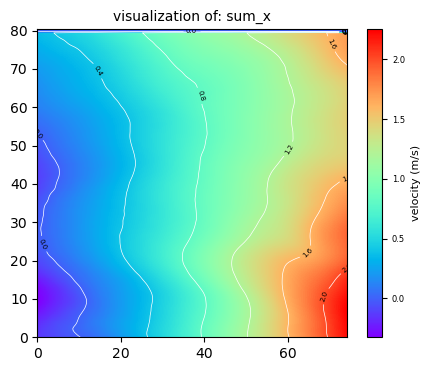

In [59]:
visualize_cfd(data_proc_filtered_adjusted['sum_x'] ,data_proc_filtered_adjusted['sum_x'].min(),data_proc_filtered_adjusted['sum_x'].max(), (5,4), 'velocity (m/s)') # min() will put the max value in the color bar

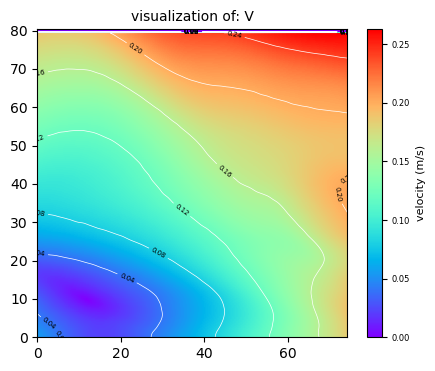

In [56]:
visualize_cfd(data_proc_filtered_adjusted['V'] ,0,data_proc_filtered_adjusted['V'].max(), (5,4), 'velocity (m/s)') # max() will put the max value in the color bar

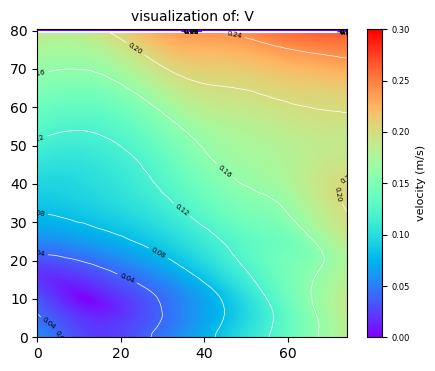

In [55]:
visualize_cfd(data_proc_filtered_adjusted['V'] ,0,0.3, (5,4), 'velocity (m/s)')  # 0,0.3 cutamized

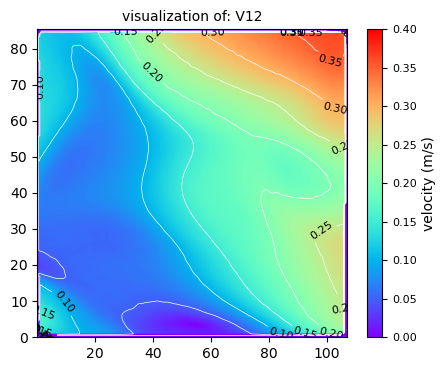

In [180]:
visualize_cfd(data_V['V12'], 0,0.4, (5,4), 'velocity (m/s)')
# visualize_cfd(data_vort_ab.mean(axis=1), -15,15, (6,5), 'vorticity_ab', 1 )

### Visualizing CFD + vortex

In [132]:
def visualize_cfd_vortex(data_velocity, data_x, data_y,  vmin, vmax, fig_size,measurement_unit,scale_factor,label_repeat):
    """
    Visualize CFD data using contour and imshow.

    Parameters:
    - dataframe (pd.DataFrame): DataFrame with a double index ('X' and 'Y') and a column for the values ('Z').
    - z_col (str): Name of the column representing the Z values to visualize.
    - vmin (float): Minimum scale for imshow.
    - vmax (float): Maximum scale for imshow.
    - figsize (tuple): Figure size for the plot.
    """
    
    df =data_velocity.unstack(level=0)
    X, Y = np.meshgrid(df.columns, df.index)
    a,b = fig_size
    Z = df.values
    U = data_x.unstack(level=0).values[::scale_factor, ::scale_factor]
    V = data_y.unstack(level=0).values[::scale_factor, ::scale_factor]
    X_quiver = X[::scale_factor, ::scale_factor]
    Y_quiver = Y[::scale_factor, ::scale_factor]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=fig_size)

    # Plot using imshow
    contour_imshow = ax.imshow(Z, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower',
                    vmin=vmin, vmax=vmax,                  #vmin=np.abs(Z).min(), vmax=np.abs(Z).max(),     SET THE VMIN VMAX AUTOMATICALLY
                    aspect='auto')
#plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', interpolation='bilinear', cmap='rainbow', alpha=0.5)
    # Add a colorbar
    cbar = fig.colorbar(contour_imshow, ax=ax)
    cbar.set_label(measurement_unit, fontsize=b+4) # fontsize=b+4 change the size of font, examples: b+1, b-1 .......
    cbar.ax.tick_params(labelsize=b+4) 
    # Plot using contour
    contour = ax.contour(X, Y, Z, colors='w', linewidths=0.5)
    label_locations = []
    for line in contour.collections:
        for path in line.get_paths():
            vertices = path.vertices
            n = len(vertices)
            for i in range(label_repeat):
                idx = (i * n) // label_repeat
                label_locations.append(vertices[idx])
                
    ax.clabel(contour, inline=True, colors='w' , manual=label_locations, fontsize=b, 
              inline_spacing = 8)
    quiv = ax.quiver(X_quiver, Y_quiver, U , V, 
                      angles='xy' , scale_units='xy',  units= 'width',  width=0.0015   #(standard value is 0.002),
                      )
    
    # Set labels and title

    ax.set_title(f'visualization of: {data_velocity.name}', fontsize=2*b-2)    #to change the title, # 'visualization'

    # Show the plot
    plt.show()

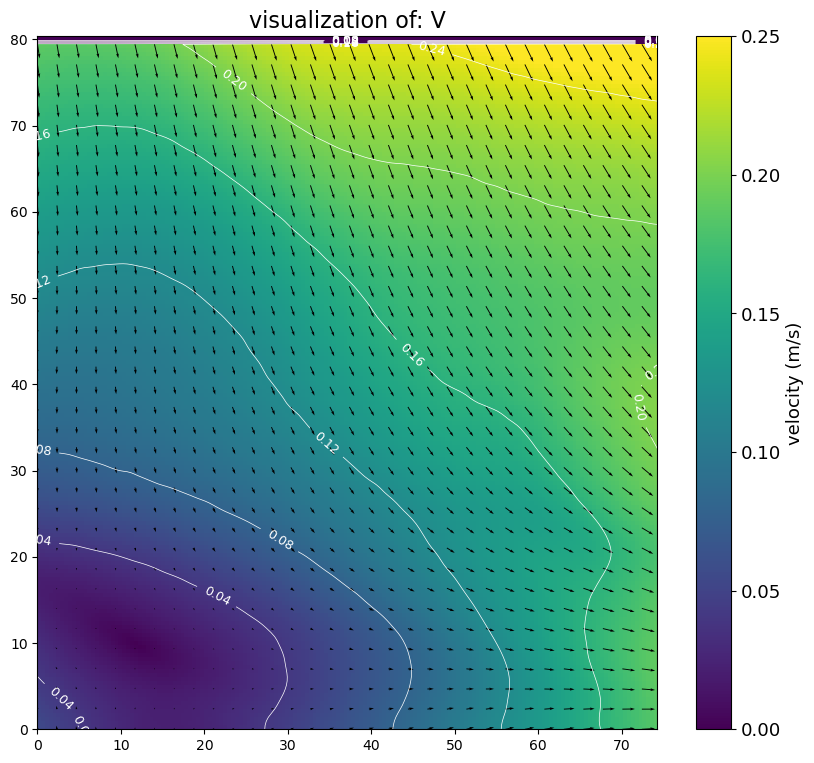

In [133]:
visualize_cfd_vortex(data_proc_filtered_adjusted['V'], data_proc_filtered_adjusted['mean_x'] , data_proc_filtered_adjusted['mean_y']  ,  0,0.25,   
                     (10,9), 'velocity (m/s)',   5,2)

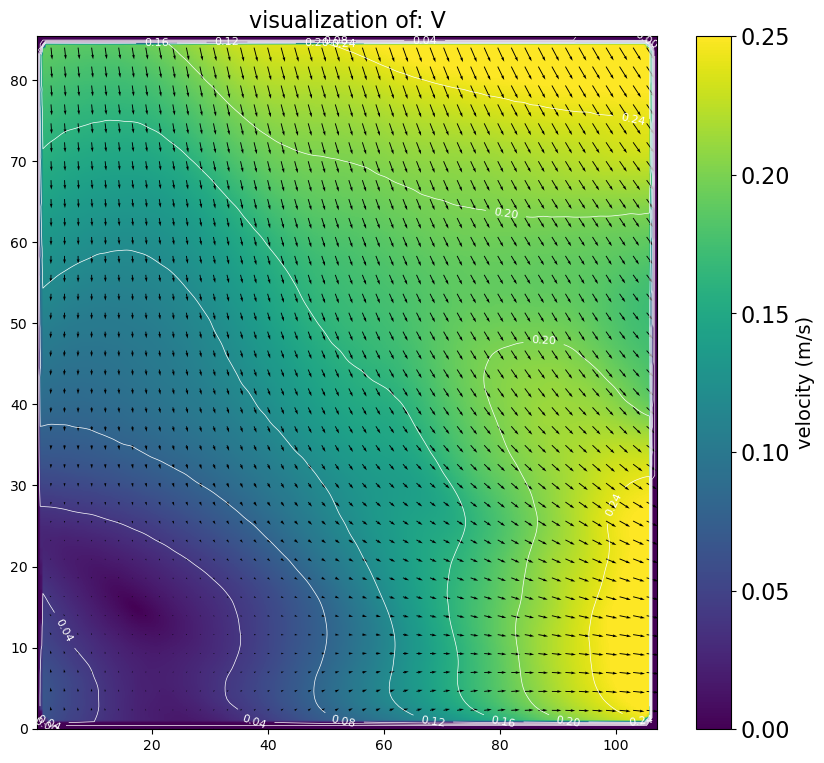

In [80]:
visualize_cfd_vortex(data_proc['V'], data_proc['mean_x'] , data_proc['mean_y']    ,  0,0.25,   
                     (10,9), 'velocity (m/s)',   5,2)

### Image and Video

In [40]:
def print_all_cfd(dataframe,  vmin, vmax, fig_size,measurement_unit, directory_save, dpi_input):  #repeat_label, 
    for i,column in enumerate(dataframe.columns):
        df = dataframe
        Z = df[column].unstack(level=0).values
        x = df.index.levels[0].values
        y = df.index.levels[1].values
        X, Y = np.meshgrid(x, y)
        a,b = fig_size
        # Create the plot
        fig, ax = plt.subplots(figsize=fig_size)
        ax.set_title(f'timestep: {(i*0.0778)+0.0778:04f} sec(s)', fontsize=2*b-1, loc='left')  
        ax.set_xlabel('X-axis (mm)')  
        ax.set_ylabel('Y-axis (mm)')  
        # Plot using imshow
        cax = ax.imshow(Z, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower',cmap='rainbow',
                        vmin=vmin, vmax=vmax,       #vmin=np.abs(Z).min(), vmax=np.abs(Z).max(),     SET THE VMIN VMAX AUTOMATICALLY
                        aspect='auto')
        # Add a colorbar
        cbar = fig.colorbar(cax, ax=ax)
        cbar.set_label(measurement_unit, fontsize=2*b)
        cbar.ax.tick_params(labelsize=2*b-2) 
        # Plot using contour
        contour = ax.contour(X, Y, Z, colors='w', linewidths=0.5)
        
        label_locations = []
        for line in contour.collections:
            for path in line.get_paths():
                vertices = path.vertices
                n = len(vertices)
                for j in range(2):
                    idx = (j * n) // 2
                    label_locations.append(vertices[idx])
        ax.clabel(contour, inline=True, fontsize=2*b-3, colors='black',  inline_spacing = 3, manual=label_locations
                  ) #fmt='%0.2f',  
        
        plt.savefig(os.path.join(directory_save, f'contour_{i+1:03d}.png'),dpi=dpi_input)
        plt.close(fig)
        
def video_cfd(image_directory, videosave_directory, file_name, start_name, frame_rate):
    images = [img for img in sorted(os.listdir(image_directory)) if img.endswith(".png") and img.startswith(start_name)]
    frame = cv2.imread(os.path.join(image_directory, images[0] ), )
    height, width, layers = frame.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(os.path.join( videosave_directory + start_name + '_' + file_name + str(frame_rate) +'fps.mp4' ), fourcc, frame_rate, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_directory, image)))

    cv2.destroyAllWindows()
    video.release()

def print_all_cfd_vortex(data_speed, data_u,data_v , vmin, vmax, fig_size,measurement_unit, directory_save, dpi_input):  #repeat_label, 
    data_a = data_u.copy()
    data_b = data_v.copy()
    # data_speed.columns = [np.arange(1,file_amounts+1,1)]
    # data_u.columns = [np.arange(1,file_amounts+1,1)]
    # data_v.columns = [np.arange(1,file_amounts+1,1)]
    for i, col in enumerate(data_speed.columns):
        fig, ax = plt.subplots()
        data_a.columns = data_speed.columns 
        data_b.columns = data_speed.columns 
        # Contour plot using df_1
        Z = data_speed[col].unstack(level=0).values
        x = data_speed.index.levels[0].values
        y = data_speed.index.levels[1].values
        X, Y = np.meshgrid(x, y)
        a,b = fig_size
        scale_factor = a + 1
        
        U = data_a[col].unstack(level=0).values[::scale_factor, ::scale_factor]
        V = data_b[col].unstack(level=0).values[::scale_factor, ::scale_factor]
        X_quiver = X[::scale_factor, ::scale_factor]
        Y_quiver = Y[::scale_factor, ::scale_factor]
        # Create the plot
        fig, ax = plt.subplots(figsize=fig_size)
        ax.set_title(f'timestep: {(i*0.0778)+0.0778:04f} sec(s)', fontsize=2*b-1, loc='left')  
        ax.set_xlabel('X-axis (mm)')  
        ax.set_ylabel('Y-axis (mm)')  
        # Plot using imshow
        cax = ax.imshow(Z, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower',cmap='rainbow',
                        vmin=vmin, vmax=vmax,       #vmin=np.abs(Z).min(), vmax=np.abs(Z).max(),     SET THE VMIN VMAX AUTOMATICALLY
                        aspect='auto')
        # Add a colorbar
        cbar = fig.colorbar(cax, ax=ax)
        cbar.set_label(measurement_unit, fontsize=2*b)
        cbar.ax.tick_params(labelsize=2*b-2) 
        # Plot using contour
        contour = ax.contour(X, Y, Z, colors='w', linewidths=0.5)
        
        label_locations = []
        for line in contour.collections:
            for path in line.get_paths():
                vertices = path.vertices
                n = len(vertices)
                for j in range(2):
                    idx = (j * n) // 2
                    label_locations.append(vertices[idx])
        ax.clabel(contour, inline=True, fontsize=2*b-4, colors='black',  inline_spacing = 3, manual=label_locations
                  ) #fmt='%0.2f',  
        ax.quiver(X_quiver, Y_quiver, U , V, 
                      angles='xy' , scale_units='xy',  units= 'width',  width=0.0015   #(standard value is 0.002),
                      )
        plt.savefig(os.path.join(directory_save, f'vortex_{i+1:03d}.png'),dpi=dpi_input)
        plt.close(fig)
        plt.clf()

In [41]:
#SETUP of Image and Video
frame_rate =2                                   #framerate of the video later
fig_size = (7,6)                                #figure frame ratio (width, height)
dpi_size = 200                                  # set the quality of pictures (DPI)

#BEFORE WE START, PLEASE ADD NEW FOLDERS, WITH NAME 'images' and 'video' at next to folder of datasources.

image_directory = directory_path  + 'images/'   #set the filesave destination for mass-amount pictures, we must add more folder 'images'
videosave_directory = directory_path  + 'video/' #set the filesave destination for Videosaving, we must add more folder 'video'
print(image_directory)
print(videosave_directory)

C:/Users/azimilga/project/OR Lab/project_field/images/
C:/Users/azimilga/project/OR Lab/project_field/video/


In [22]:
data_V.max()

V1     0.317747
V2     0.350685
V3     0.318835
V4     0.306601
V5     0.289677
V6     0.302788
V7     0.342210
V8     0.379354
V9     0.390841
V10    0.347077
V11    0.311861
V12    0.364121
dtype: float64

In [21]:
data_V.max().max()

0.390841

In [ ]:
print_all_cfd(data_V, 0, data_V.max().max(), fig_size, 'velocity', image_directory, dpi_size )

In [42]:
#plot the Visualized PIV at all timestep and make them as 1 video.
print_all_cfd(data_V,  0, data_V.max().max(), fig_size,'velocity (m/s)',image_directory, dpi_size) # make a figures
video_cfd (image_directory, videosave_directory, 'data_V_', 'contour', frame_rate) #make the video from figures before

In [43]:
#plot the Visualized PIV WITH THE VORTEX at all timestep and make them as 1 video.
print_all_cfd_vortex (data_V, data_x, data_y, 0,data_V.max().max(), fig_size, 'velocity (m/s)', image_directory, dpi_size)
video_cfd (image_directory, videosave_directory, 'data_V_', 'vortex', frame_rate)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### visualizing CFD v(alt)

In [ ]:
plot_PIV_3D(stdv_proc['TI (%)'], (5,5),np.arange(0,300, step=5), '(m/s)', 'ave-V')

In [ ]:
plot_PIV_vortex(data_proc['V'],data_proc['mean_x'],data_proc['mean_y'], 
                  (6,5),  30, '(m/s)', 'average V -', 7  )
plot_PIV_vortex(stdv_proc['total_std'], stdv_proc['total_std_u'],stdv_proc['total_std_u'], 
                  (6,5),  30, '(m/s)', 'stdv- V -', 7  )

In [ ]:
level_set = np.arange(0.1,0.35,step=0.02)
tick_set = level_set   # np.arange(0,0.4,step=0.02)
plot_PIV_manual(data_V['V1']    ,   (6,5),  level_set , tick_set, 'velocity (m/s)')

In [ ]:
data_proc.describe()

In [ ]:
stdv_proc.columns

In [ ]:
data_v.mean(axis=1).describe()

In [ ]:
level_set = 30
plot_PIV(stdv_proc['x_accent'] , (6,5), level_set, '(m/s)', 'u_accent')
plot_PIV(stdv_proc['total_std_x'] , (6,5), level_set, '(m/s)', 'stdv. u')
plot_PIV(stdv_proc['total_std_y'] , (6,5), level_set, '(m/s)', 'stdv. v')
plot_PIV(stdv_proc['total_std'] , (6,5), level_set, '(m/s)', 'stdv. V')
plot_PIV(data_proc['V'] , (6,5), level_set, '(m/s)', 'Average V')
plot_PIV(stdv_proc['TI (%)'] , (6,5), np.arange(0,450,step=10), '(%)', 'Turb.intensity')

### Plot Line

In [ ]:
def plot_line_spec_axis (df  , min_x, max_x, min_y, max_y, axis_plot, axis_drop, agg_func , fig_size, title):
    # we filterize / focused specific axis we want to plot
    filter_df =filter_double_index( df,min_x, max_x, min_y, max_y).reset_index().drop(axis_drop,axis=1)
    # we pivoted by specific agg.function the value according the index we have
    pivot_df = pd.pivot_table(filter_df ,index=axis_plot, aggfunc=agg_func)  
    # plot it
    fig, ax = plt.subplots(figsize=fig_size)
    ax.plot(pivot_df)
    ax.set_xlabel(axis_plot + '-coordinate')
    ax.set_ylabel(title)
    plt.show()
    plt.clf()

In [ ]:
plot_line_spec_axis(data_value[['vort_z1', 'vort_z2']], 0,120,50,51, 'x', 'y', 'mean', (4,3), 'vortex_z (1/s)'     )

In [ ]:
plot_line_spec_axis(data_vort_z[['vort_z1', 'vort_z2']], 0,100,50,51, 'x', 'y', 'mean', (4,3), 'vortex_z (1/s)'     )

In [ ]:
plot_line_spec_axis(data_vort_z.mean(axis=1), 0,100,50,51, 'x', 'y', 'mean', (4,3), 'vortex_z (1/s)'  )

In [ ]:
def filter_pivot (df  , min_x, max_x, min_y, max_y, axis_plot, axis_drop, agg_func , line_1):
    # we filterize / focused specific axis we want to plot
    filter_df =filter_double_index( df,min_x, max_x, min_y, max_y).reset_index().drop(axis_drop,axis=1)
    # we pivoted by specific agg.function the value according the index we have
    pivot_df = pd.pivot_table(filter_df ,index=axis_plot, aggfunc=agg_func)  
    pivot_df.columns = [line_1]
    return pivot_df

In [ ]:
#PIVOTING WITH X-Coordinate
pivot_x0 = filter_pivot ( data_vort_z.mean(axis=1), 0,100,30,31, 'x', 'y', 'mean', 'line1')
pivot_x1 = filter_pivot ( data_vort_z.mean(axis=1), 0,100,50,51, 'x', 'y', 'mean', 'line2')
pivot_x2 = filter_pivot ( data_vort_z.mean(axis=1), 0,100,60,62, 'x', 'y', 'mean', 'line3')
pivot_x3 = filter_pivot ( data_vort_z.mean(axis=1), 0,100,75,76, 'x', 'y', 'mean', 'line4')

# pivot_x1.to_csv (directory_path + 'pivot_vort_z_x1.csv', index=True)

In [ ]:
#PIVOTING WITH Y-Coordinate

pivot_y0 = filter_pivot ( data_vort_z.mean(axis=1), 30,31,0,100, 'y','x',  'mean', 'line1')    #possible also to change data like    data_vort_z[[ 'vort_z1' ,  'vort_z2' ]]   #Double Bracket
pivot_y1 = filter_pivot ( data_vort_z.mean(axis=1), 50,51,0,100, 'y','x',  'mean', 'line2')      
pivot_y2 = filter_pivot ( data_vort_z.mean(axis=1), 60,62,0,100, 'y', 'x', 'mean', 'line3')
pivot_y3 = filter_pivot ( data_vort_z.mean(axis=1), 85,86,0,100,'y', 'x',  'mean', 'line4')

# pivot_y1.to_csv (directory_path + 'pivot_vort_z_y1.csv', index=True)

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(pivot_x0, label='line1')   #manually write or multiple it if you want to add more line.
ax.plot(pivot_x1, label='line2')
ax.plot(pivot_x2, label='line3')
ax.plot(pivot_x3, label='line4')

ax.set_xlabel( '-coordinate')
ax.set_ylabel('value')
ax.legend()
plt.show()
plt.clf()